# Netflix Content Analysis using Python

This project analyzes Netflix content dataset to explore trends in content type, ratings, genres, and geographical distribution using Python.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("Set2")
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df = pd.read_csv("/kaggle/input/datasets/komalch26/netflix-eda/netflix_titles.csv") #Data loaded successfully for analysis

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info() #dataset contains 8807 rows and 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df_copy = df.copy()


In [7]:
df['director'] = df['director'].fillna('Unknown')

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors = 'coerce')

In [9]:
df['cast'] = df['cast'].fillna('No Data')


Missing values handlel and date column converted to datetime format


# Movies Vs Tv Shows

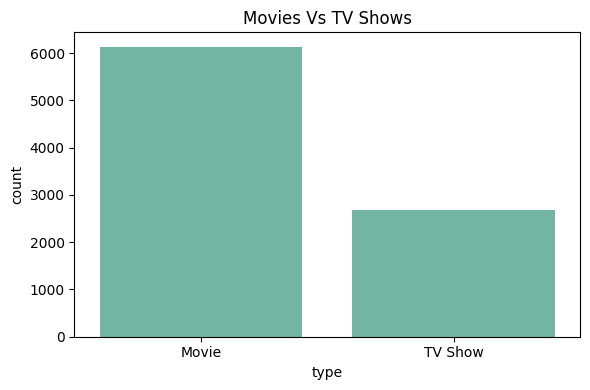

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data = df)
plt.title("Movies Vs TV Shows")
plt.tight_layout()
plt.show()

**Insights** : Movies are significantly higher in number compared to TV Shows

# Content Added Over Years

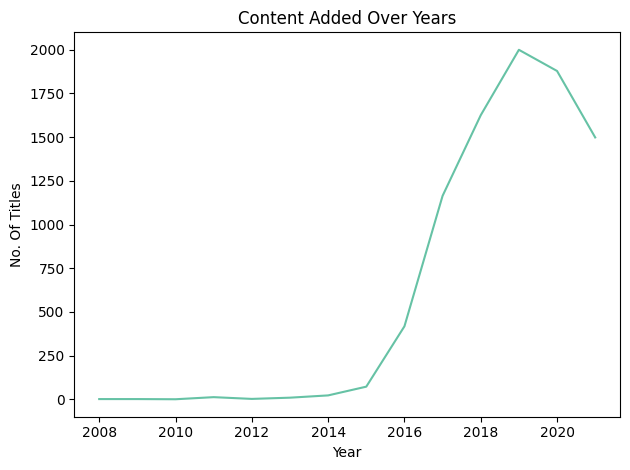

In [11]:
df["year_added"] = df['date_added'].dt.year
year_counts = df['year_added'].value_counts().sort_index()
plt.plot(year_counts.index,year_counts.values)
plt.title("Content Added Over Years")
plt.xlabel("Year")
plt.ylabel("No. Of Titles")
plt.tight_layout()
plt.show()


**Insights** : Major growth in content addition is observed after 2015.

# Top 10 Countries By Content

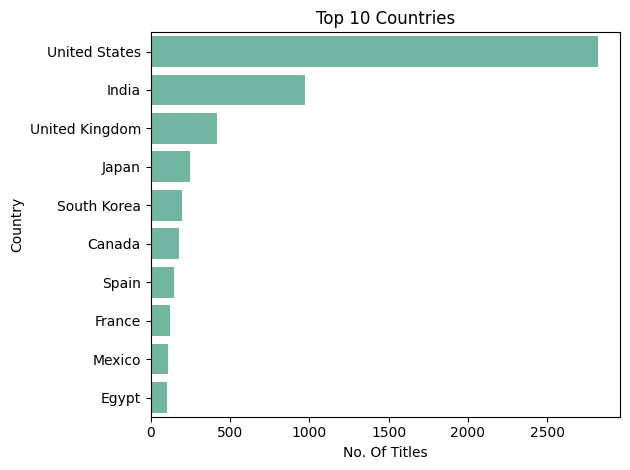

In [12]:
country_counts = df['country'].value_counts().head(10)
sns.barplot(x= country_counts.values, y= country_counts.index)
plt.title("Top 10 Countries")
plt.xlabel("No. Of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

**Insights** : United States contributes the Highest Content.

# Content Rating Distribution

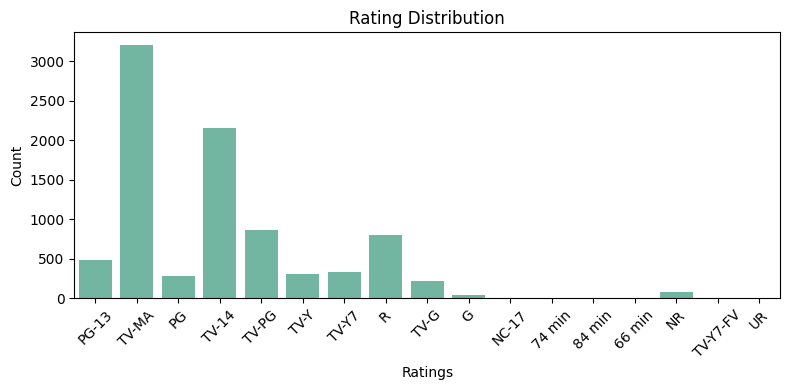

In [13]:
plt.figure(figsize= (8,4))
sns.countplot(x= "rating", data = df)
plt.title("Rating Distribution")
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Insights** :TV-MA is the most common content rating on the platform.

# Top 10 Genres

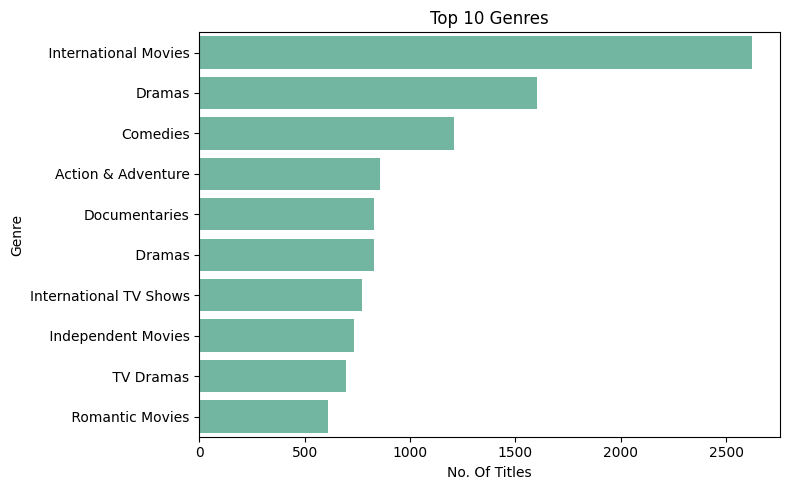

In [14]:
df['listed_in'] = df['listed_in'].str.split(',')
df_exploded = df.explode('listed_in')
genre_counts = df_exploded['listed_in'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x= genre_counts.values, y = genre_counts.index)
plt.title("Top 10 Genres")
plt.xlabel('No. Of Titles')
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

**Insights**: International Movies and Drana are the most popular genres.

# 